***
***
***

<br><h2></h2>
<br><h3>Mohammad Asad Pervez</h3>
<h4>DAT-5303 | Unsupervised Machine Learning</h4>
<br>
Hult International Business School<br><br><br>

***
***
***

In [1]:
########################################
# importing packages
########################################
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering



C:\python\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***
***

<br>
Run the following code to load the dataset and set print options.

In [2]:
########################################
# loading data and setting display options
########################################
# loading data
customers_df = pd.read_excel('survey_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

***
***

<br>
<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [3]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

***
***

<br>
<strong>Challenge 2</strong><br>
Drop demographic information and scale the data.

In [4]:
# scaling (normalizing) variables before correlation analysis

# dropping demographic information
purchase_behavior = customers_df.drop(['surveyID',
                                      'What laptop do you currently have?',
                                      'What laptop would you buy in next assuming if all laptops cost the same?',
                                      'What program are you in?',
                                      'What is your age?',
                                      'Gender',
                                      'What is your nationality? ',
                                      'What is your ethnicity?'],
                                      axis = 1)


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(purchase_behavior)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(purchase_behavior)


# converting scaled data into a DataFrame
purchases_scaled = pd.DataFrame(X_scaled)


# reattaching column names
purchases_scaled.columns = purchase_behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(purchase_behavior), '\n\n')
print(pd.np.var(purchases_scaled))

Am the life of the party                                                        1.278171
Feel little concern for others                                                  1.708270
Am always prepared                                                              0.847240
Get stressed out easily                                                         1.454394
Have a rich vocabulary                                                          0.904716
Don't talk a lot                                                                1.185432
Am interested in people                                                         0.961081
Leave my belongings around                                                      1.864871
Am relaxed most of the time                                                     1.186543
Have difficulty understanding abstract ideas                                    1.208200
Feel comfortable around people                                                  0.984127
Insult people        

C:\python\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
C:\python\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


***
***

<br>

<h3>Part II: Principal Component Analysis</h3>

Our process here is to:
1. Develop a PCA model with no limit to principal components
2. Analyze the <strong>explained_variance_ratio</strong> and the <strong>scree plot</strong>
3. Decide how many components to RETAIN
4. Build a new model with a limited number of principal components
5. Interpret your results (what does each PC represent)


<br><br>
<strong>Challenge 3</strong><br>
Develop a PCA object with no limit to principal components and analyze its scree plot.

In [5]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 7,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(X_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", X_scaled.shape)
print("PCA shape     :",  customer_pca.shape)

Original shape: (147, 71)
PCA shape     : (147, 7)


***
***

<br>
<strong></strong><br>
Reducing the number of principal components to a reasonable number based on the scree plot. Note that we do not need to rerun the scree plot. In this example, we will assume three PCs is a reasonable number based on the elbow in the scree plot. Also note that it would have been reasonable to retain enough PCs so that the cumulative explained variance ratio is greater than or equal to 0.80.

***
***

<br>
<strong>OPTIONAL STEP</strong><br>Run the following code to compare the variance of the unlimited PCA model with the variance of the reduced PCA model. We are doing this in this script simply to show that the explain variance in each principal component does not change after dropping smaller PCs.

In [9]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(purchases_scaled.columns)


# ##################
# ### 3 PC Model ###
# ##################
# # transposing pca components (pc = 3)
# factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# # naming rows as original features
# factor_loadings_3 = factor_loadings_3.set_index(purchases_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}

""")


MAX Components Factor Loadings
------------------------------
                                                                                 0     1     2     3     4     5     6
Am the life of the party                                                     -0.03  0.14 -0.24  0.14 -0.04  0.06  0.11
Feel little concern for others                                                0.09  0.06 -0.09 -0.01  0.13 -0.08 -0.13
Am always prepared                                                           -0.08 -0.05 -0.06 -0.15 -0.02  0.04  0.13
Get stressed out easily                                                       0.03  0.26  0.05 -0.02 -0.22  0.13 -0.07
Have a rich vocabulary                                                       -0.11 -0.05 -0.06 -0.14 -0.08 -0.11  0.30
Don't talk a lot                                                              0.07  0.05  0.24 -0.08  0.20 -0.03 -0.03
Am interested in people                                                      -0.08  0.02 -0.00  0.28 -0.

C:\python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


***
***

<br>
<strong>Challenge 5</strong><br>
Namimg principal components based on the latent traits they reflect.<br>

In [11]:
# naming each principal component
factor_loadings.columns = [  'Draco_Malfoy',
                                'Bi-polar',
                                'Shy_Introverts',
                                'Frat_Boy',
                                'Monk',
                                'Software_Engineer',
                                'Condescending'
                          ]


# checking the result
factor_loadings

,Draco_Malfoy,Bi-polar,Shy_Introverts,Frat_Boy,Monk,Software_Engineer,Condescending
Am the life of the party,-0.031751,0.141773,-0.241404,0.135963,-0.036607,0.057273,0.107606
Feel little concern for others,0.087331,0.063321,-0.092999,-0.012940,0.130851,-0.083577,-0.128338
Am always prepared,-0.079372,-0.047238,-0.057714,-0.154598,-0.020839,0.038653,0.127568
Get stressed out easily,0.027193,0.258501,0.054631,-0.022038,-0.216182,0.127703,-0.071338
Have a rich vocabulary,-0.111690,-0.049898,-0.060304,-0.138256,-0.077484,-0.111681,0.302208
Don't talk a lot,0.069154,0.045378,0.240732,-0.080451,0.198400,-0.031816,-0.031819
Am interested in people,-0.083913,0.016785,-0.004471,0.279244,-0.050333,-0.104401,0.134771
Leave my belongings around,0.065219,0.105212,-0.066925,0.138126,0.189238,-0.154280,-0.003389
Am relaxed most of the time,-0.009805,-0.089612,-0.045642,0.092173,0.303613,-0.128246,0.141506
Have difficulty understanding abstract ideas,0.089724,0.128834,0.050291,0.217250,-0.104409,0.205031,-0.016752


***
***

<br>
<strong>Challenge 6</strong><br>
Analyzing the factor loadings for each customer in the dataset.


In [12]:
# analyzing factor strengths per customer
X_pca_reduced = pca.transform(purchases_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# checking the results
X_pca_df

,0,1,2,3,4,5,6
0,0.263685,-0.242309,0.037791,-1.132388,-1.172681,1.399546,0.415370
1,-0.705979,1.281930,1.489246,-1.810704,1.511509,-1.044552,-1.889108
2,3.556424,-3.685412,-3.115627,-2.777181,1.256726,1.262991,1.832517
3,-1.555080,3.779166,1.192246,2.874211,1.389691,-0.900146,-1.634310
4,5.550014,2.164598,-1.352917,0.232487,-0.042340,0.626522,1.777759
5,4.850385,2.116925,2.051270,0.376678,-1.396264,-0.016145,0.562572
6,0.861921,2.307137,1.021804,-0.466289,-0.301536,-0.293541,-1.465041
7,0.646421,0.462900,-2.293097,3.484793,5.913445,2.817419,-1.427795
8,-1.809188,-2.832663,-1.565832,0.216148,-0.920857,0.023403,0.806681
9,1.802361,-1.021184,0.817247,-0.470834,0.621463,1.145107,-0.619635


***
***

<br><h3>Part III: Clustering</h3><br>

In [13]:
pd.np.var(X_pca_df)

C:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


0    11.843268
1     4.769661
2     4.333060
3     3.656014
4     3.182214
5     2.515997
6     2.004416
dtype: float64

In [14]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(factor_loadings)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(factor_loadings)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled)


# reattaching column names
pca_scaled.columns = [  'Draco_Malfoy',
                                'Bi-polar',
                                'Shy_Introverts',
                                'Frat_Boy',
                                'Monk',
                                'Software_Engineer',
                                'Condescending'
                          ]



# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

0    11.843268
1     4.769661
2     4.333060
3     3.656014
4     3.182214
5     2.515997
6     2.004416
dtype: float64 


Draco_Malfoy         1.0
Bi-polar             1.0
Shy_Introverts       1.0
Frat_Boy             1.0
Monk                 1.0
Software_Engineer    1.0
Condescending        1.0
dtype: float64


C:\python\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
C:\python\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


***
***

<br>
By Running the following code to develop a dendrogram, our goal here is to understand how many clusters to build using k-Means.

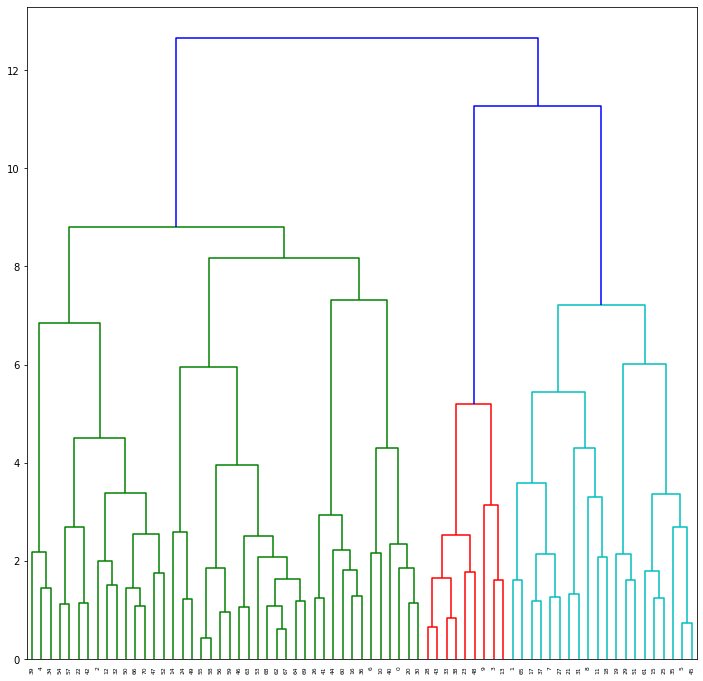

In [15]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

***
***

<br>
<strong>Challenge 8</strong><br>
Developing a code to analyze the inertia plot. Our goal here is to develop more candidates for the number of clusters we might want to develop.

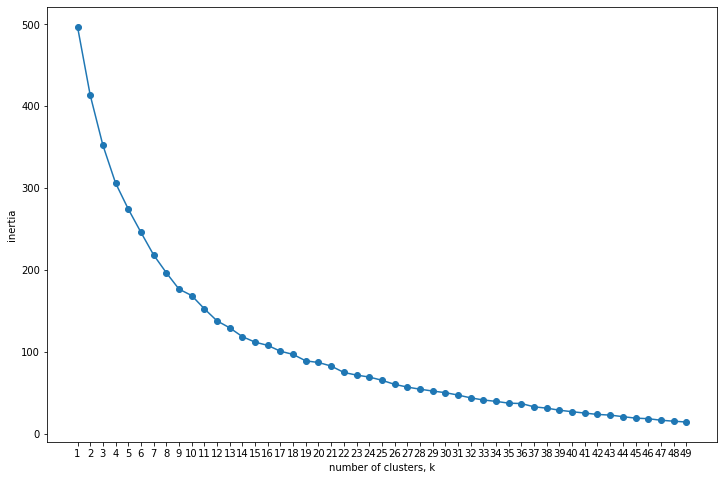

In [17]:
# calling the inertia_plot() function
interia_plot(data=pca_scaled)

***
***

<br>
<strong>Challenge 9</strong><br>
This is where we test our candidate number of clusters. When we find a clustering that we like, we move forward.

In [19]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters = 9,
                        random_state = 802)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

1    15
4    12
3     8
2     8
7     7
6     7
8     5
5     5
0     4
Name: Cluster, dtype: int64


***
***

<br>
<strong>Challenge 10</strong><br>
Displaying the centroids (mean values) for each cluster. Interpret their meaning.

In [20]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = [  'Draco_Malfoy',
                                'Bi-polar',
                                'Shy_Introverts',
                                'Frat_Boy',
                                'Monk',
                                'Software_Engineer',
                                'Condescending'
                           ]


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Draco_Malfoy,Bi-polar,Shy_Introverts,Frat_Boy,Monk,Software_Engineer,Condescending
0,1.36,-0.19,0.06,0.87,0.08,2.01,0.54
1,-0.96,-0.31,-0.48,0.59,0.13,0.05,-0.67
2,0.98,2.13,0.16,-0.61,-1.29,-0.12,-0.17
3,1.15,0.46,-1.05,0.17,0.89,-0.18,0.09
4,-0.88,-0.56,0.10,-0.87,-0.28,0.93,0.04
5,0.07,0.20,-0.32,-0.40,0.16,-1.57,-1.36
6,-0.56,-0.29,0.97,1.25,-0.97,-0.73,0.68
7,-0.01,-1.02,-0.16,-0.69,0.66,-0.76,1.73
8,1.22,-0.09,1.75,-0.05,1.13,0.17,-0.40


***
***

<br>
<strong>Challenge 11</strong><br>
Concatenating channel, region, and PCA components into one DataFrame.

In [28]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                          X_pca_df],
                          axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([customers_df.loc[ : , ['What laptop do you currently have?',
                                            'What laptop would you buy in next assuming if all laptops cost the same?',
                                            'What program are you in?',
                                            'What is your age?',
                                           'Gender',
                                            'What is your nationality? ',
                                            'What is your ethnicity?'
                                                        ]],
                                  clst_pca_df],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current_Laptop',
                               'Next_buy',
                               'Program',
                               'age',
                               'gender',
                               'nationality',
                                'ethnicity',
                              'cluster',
                                 'Draco_Malfoy',
                                'Bi-polar',
                                'Shy_Introverts',
                                'Frat_Boy',
                                'Monk',
                                'Software_Engineer',
                                'Condescending']


# checking the results
print(final_pca_clust_df.head(n = 5))

   Current_Laptop        Next_buy                           Program  age  gender nationality            ethnicity  cluster  Draco_Malfoy  Bi-polar  Shy_Introverts  Frat_Boy      Monk  Software_Engineer  Condescending
0         Macbook         Macbook     DD (MIB & Business Analytics)   25  Female     ecuador    Hispanic / Latino      3.0      0.263685 -0.242309        0.037791 -1.132388 -1.172681           1.399546       0.415370
1  Windows laptop  Windows laptop       One year Business Analytics   27    Male     Ecuador    Hispanic / Latino      5.0     -0.705979  1.281930        1.489246 -1.810704  1.511509          -1.044552      -1.889108
2  Windows laptop  Windows laptop       One year Business Analytics   25    Male      Indian  West Asian / Indian      4.0      3.556424 -3.685412       -3.115627 -2.777181  1.256726           1.262991       1.832517
3  Windows laptop  Windows laptop       One year Business Analytics   26  Female      indian  West Asian / Indian      2.0     -1.55

***
***

<br>
Adding labels to categorical variables.

In [31]:
# renaming channels
channel_names = {1 : 'Macbook',
                 2 : 'Windows Laptop'
                }


final_pca_clust_df['Current_Laptop'].replace(channel_names, inplace = True)



# renaming regions
region_names = {1 : 'Macbook',
                 2 : 'Windows Laptop',
                3 : 'Chromebook'
               }


final_pca_clust_df['Next_buy'].replace(region_names, inplace = True)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6',
                6: 'Cluster 7',
                 7 : 'Cluster 8',
                 8 : 'Cluster 9'}


final_pca_clust_df['cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

,Current_Laptop,Next_buy,Program,age,gender,nationality,ethnicity,cluster,Draco_Malfoy,Bi-polar,Shy_Introverts,Frat_Boy,Monk,Software_Engineer,Condescending
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,Cluster 4,0.263685,-0.242309,0.037791,-1.132388,-1.172681,1.399546,0.415370
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,Cluster 6,-0.705979,1.281930,1.489246,-1.810704,1.511509,-1.044552,-1.889108
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,Cluster 5,3.556424,-3.685412,-3.115627,-2.777181,1.256726,1.262991,1.832517
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,Cluster 3,-1.555080,3.779166,1.192246,2.874211,1.389691,-0.900146,-1.634310
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,Cluster 8,5.550014,2.164598,-1.352917,0.232487,-0.042340,0.626522,1.777759
5,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,Cluster 9,4.850385,2.116925,2.051270,0.376678,-1.396264,-0.016145,0.562572
6,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,Cluster 7,0.861921,2.307137,1.021804,-0.466289,-0.301536,-0.293541,-1.465041
7,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,Cluster 4,0.646421,0.462900,-2.293097,3.484793,5.913445,2.817419,-1.427795
8,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,Cluster 8,-1.809188,-2.832663,-1.565832,0.216148,-0.920857,0.023403,0.806681
9,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,Cluster 1,1.802361,-1.021184,0.817247,-0.470834,0.621463,1.145107,-0.619635


***
***

<br>
<h3>Part IV: Analyze with Demographics</h3><br>
Now that we've completed all of our preparation through machine learning, we can analyze our results with demographics and other data.<br><br>

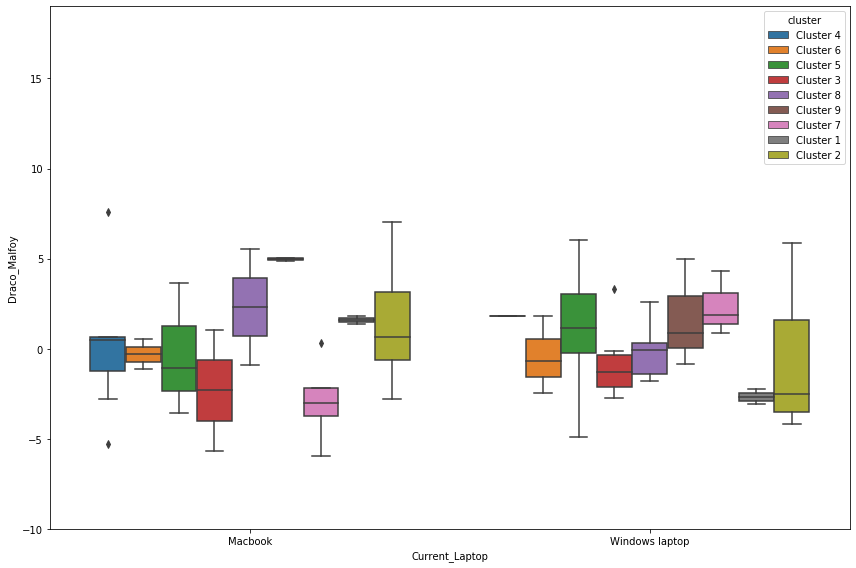

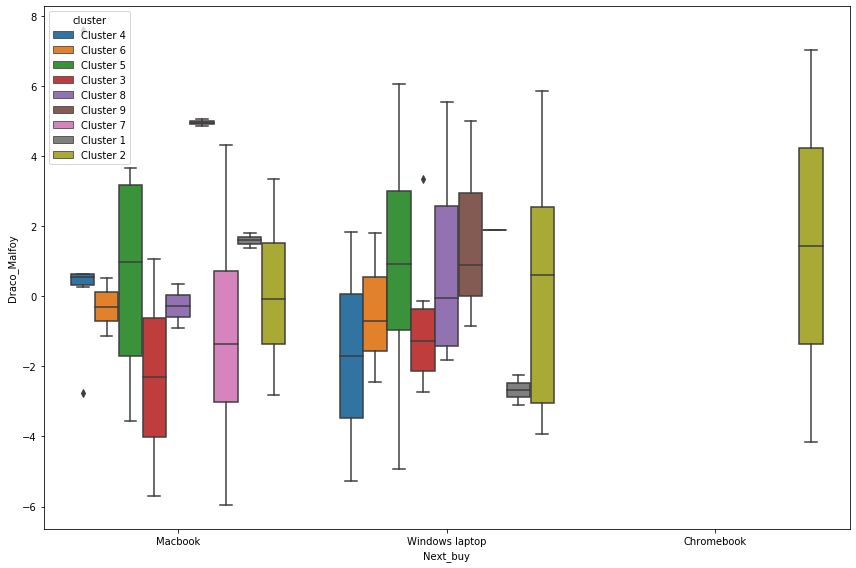

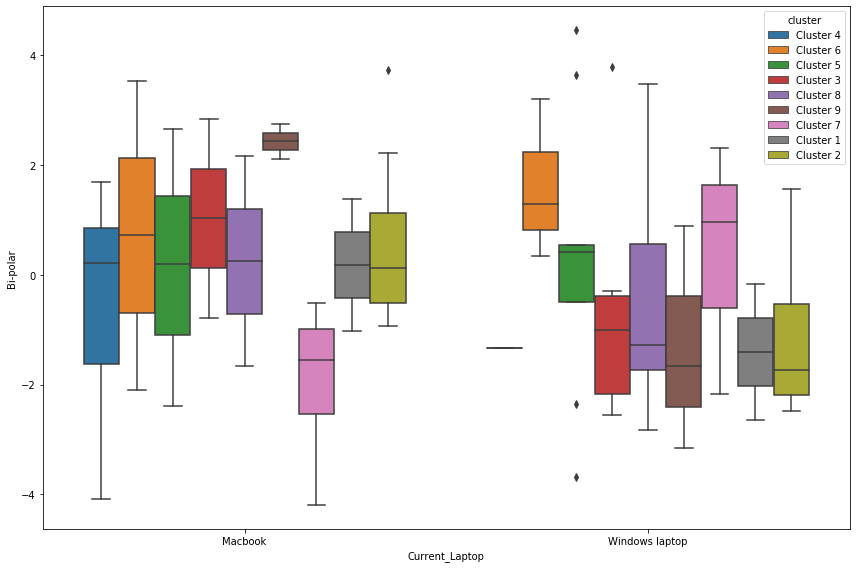

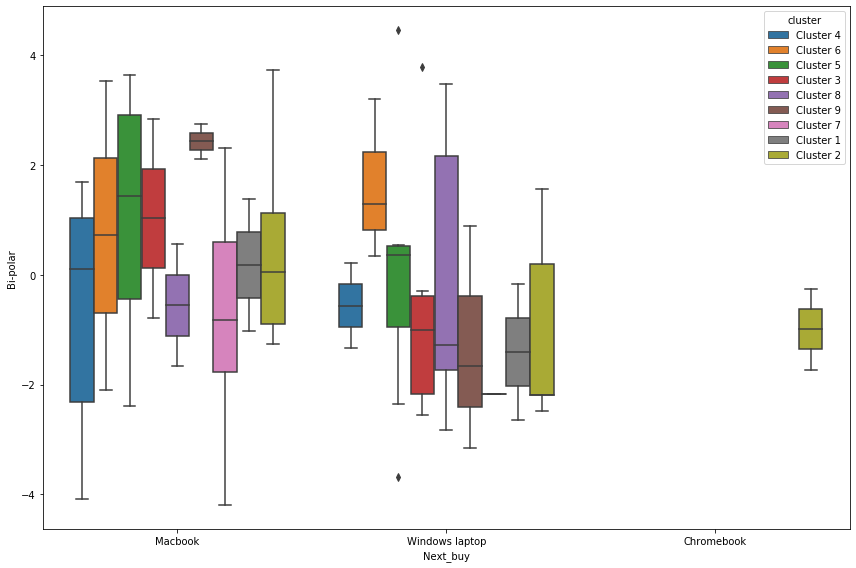

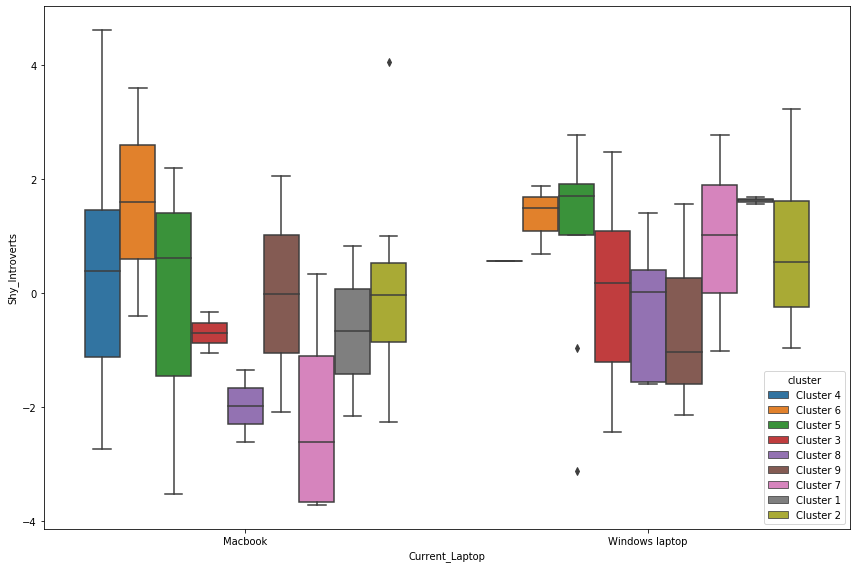

<Figure size 432x288 with 0 Axes>

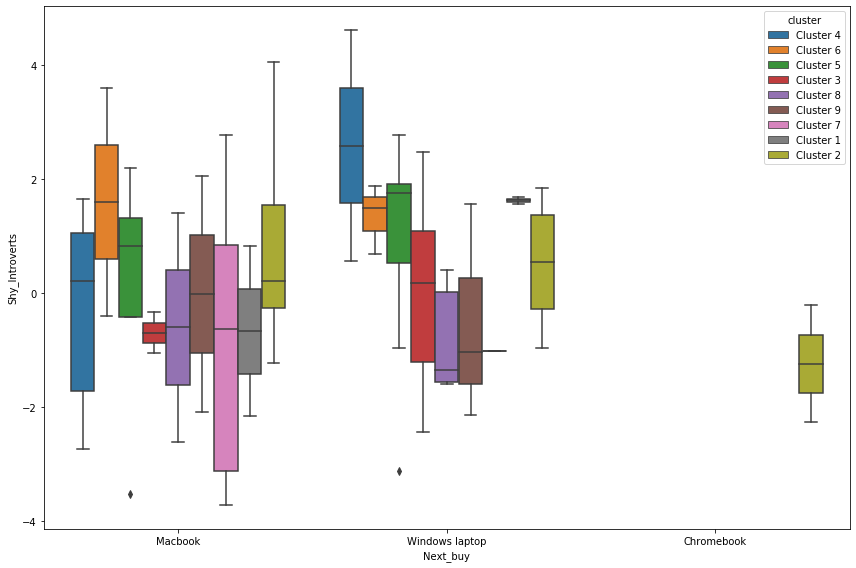

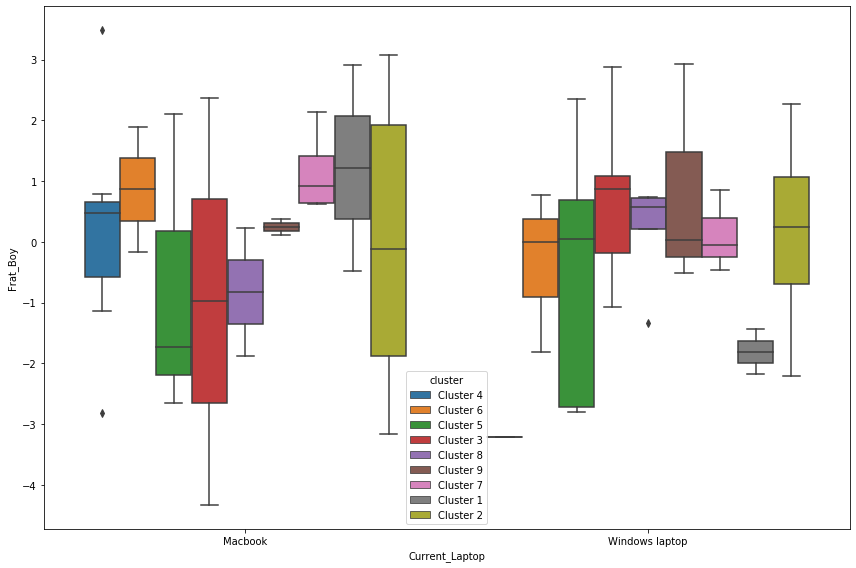

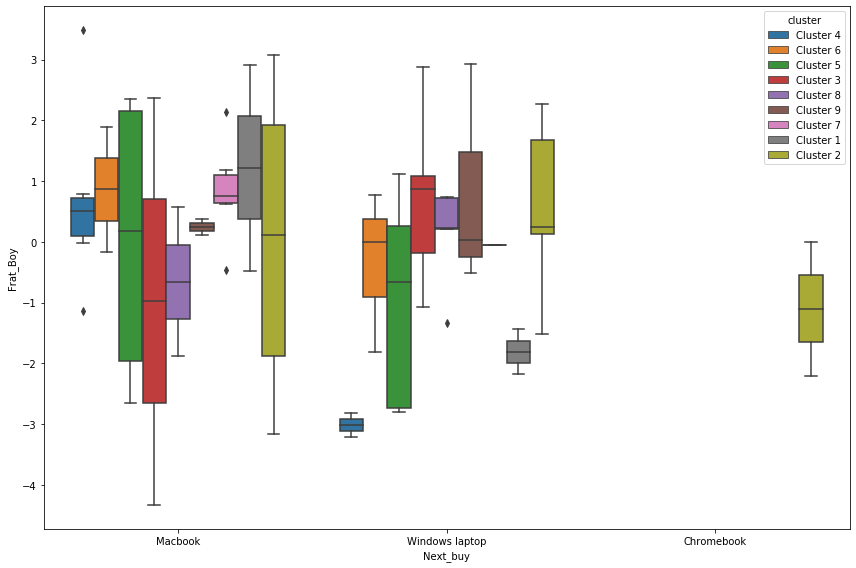

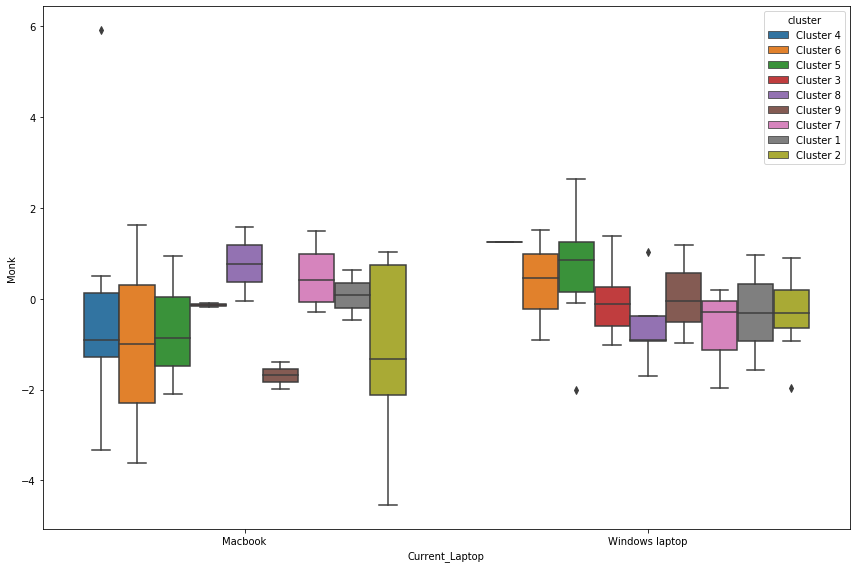

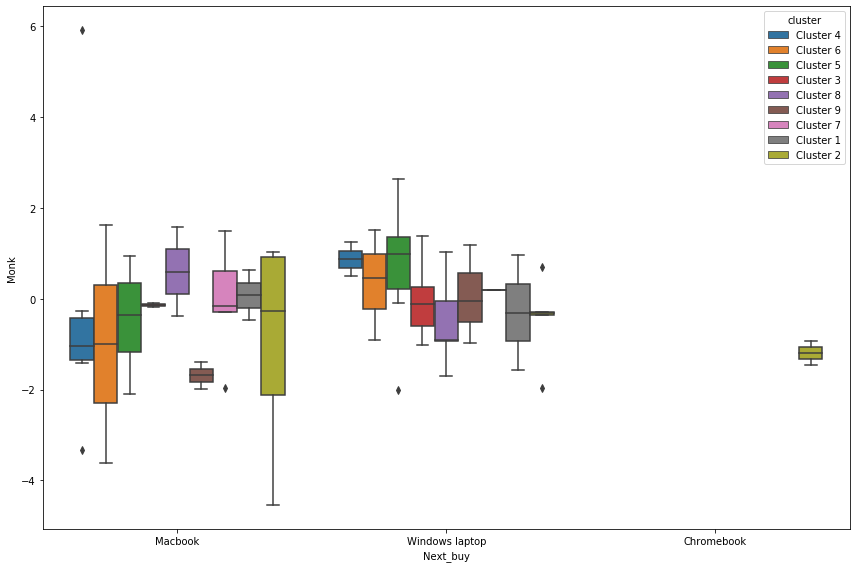

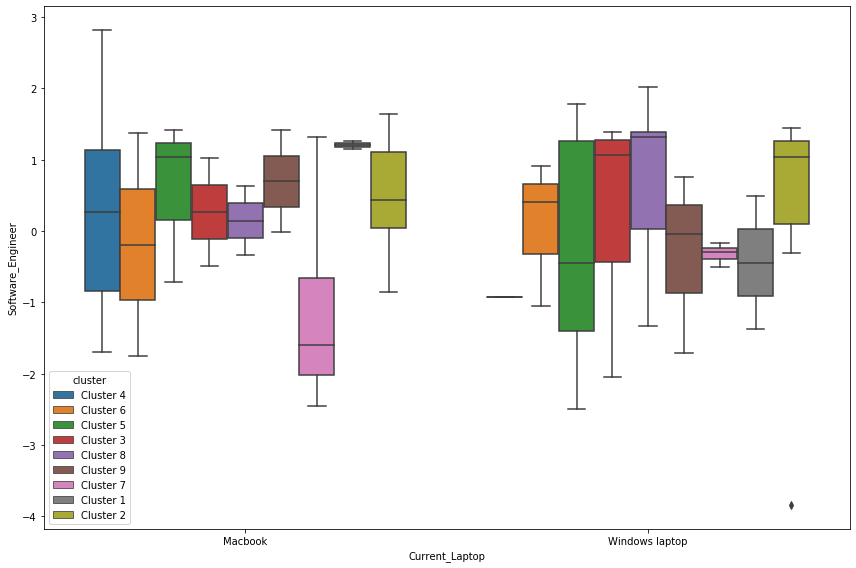

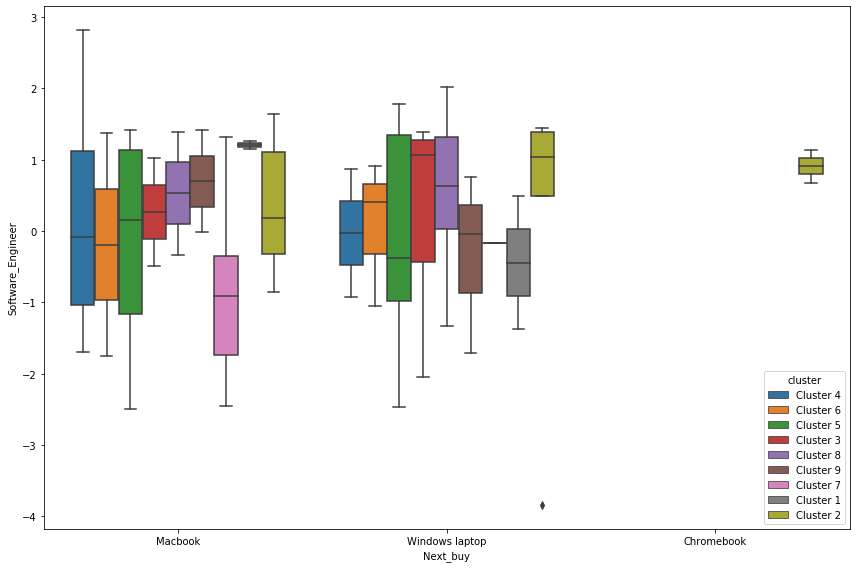

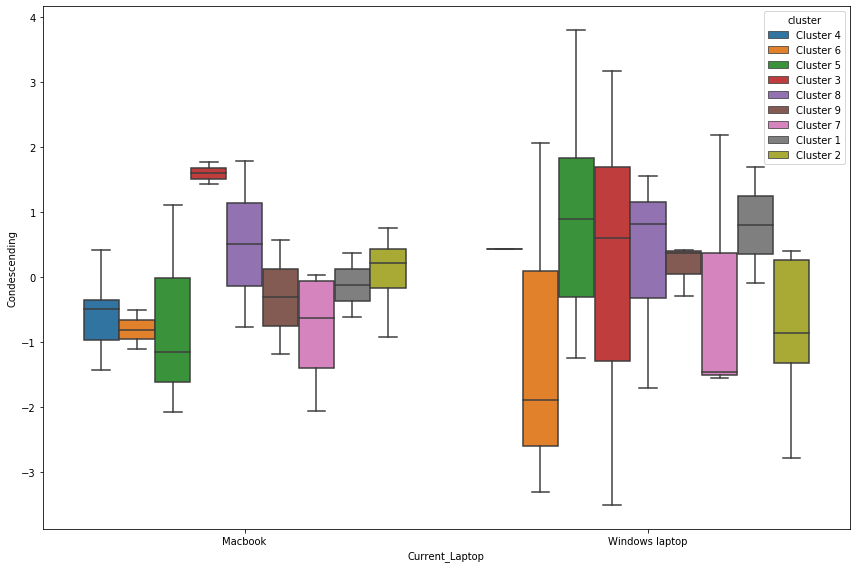

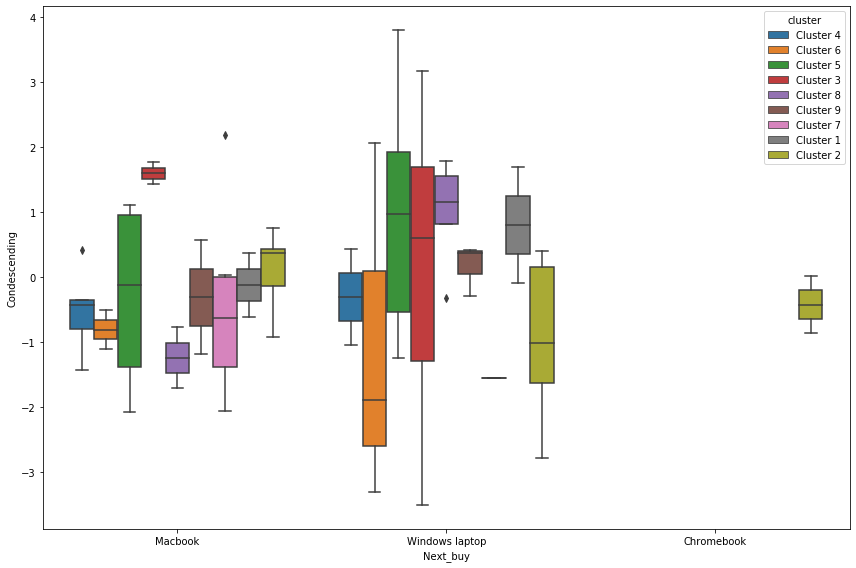

In [35]:
########################
# Current_Laptop
########################

# Herbivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Draco_Malfoy',
            hue = 'cluster',
            data = data_df)

plt.ylim(-10, 19)
plt.tight_layout()
plt.show()

# Herbivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_buy',
            y = 'Draco_Malfoy',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-1, 8)
plt.tight_layout()
plt.show()




# Fancy Diners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Bi-polar',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-3, 6)
plt.tight_layout()
plt.show()

# Fancy Diners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_buy',
            y = 'Bi-polar',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-3, 5)
plt.tight_layout()
plt.show()



# Winers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Shy_Introverts',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()

#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()
# Winers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_buy',
            y = 'Shy_Introverts',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-4, 3)
plt.tight_layout()
plt.show()

# Winers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Frat_Boy',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_buy',
            y = 'Frat_Boy',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-4, 3)
plt.tight_layout()
plt.show()

# Winers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Monk',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_buy',
            y = 'Monk',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-4, 3)
plt.tight_layout()
plt.show()

# Winers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Software_Engineer',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_buy',
            y = 'Software_Engineer',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-4, 3)
plt.tight_layout()
plt.show()




# Winers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Condescending',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_buy',
            y = 'Condescending',
            hue = 'cluster',
            data = data_df)

#plt.ylim(-4, 3)
plt.tight_layout()
plt.show()





***
***

<br>

~~~
 __     __                               _        _ _   _ 
 \ \   / /                              | |      (_) | | |
  \ \_/ /__  _   _   _ __ ___   __ _  __| | ___   _| |_| |
   \   / _ \| | | | | '_ ` _ \ / _` |/ _` |/ _ \ | | __| |
    | | (_) | |_| | | | | | | | (_| | (_| |  __/ | | |_|_|
    |_|\___/ \__,_| |_| |_| |_|\__,_|\__,_|\___| |_|\__(_)
                                                          
                                                          
~~~